In [1]:
import librosa
path = 'string_sound.wav'
audio, sample_rate = librosa.load(path, duration= 0.3)

In [2]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
Audio(audio, rate = sample_rate)


<function matplotlib.pyplot.show(close=None, block=None)>

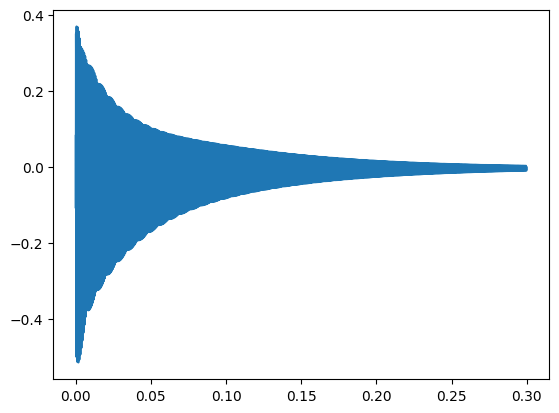

In [3]:
time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

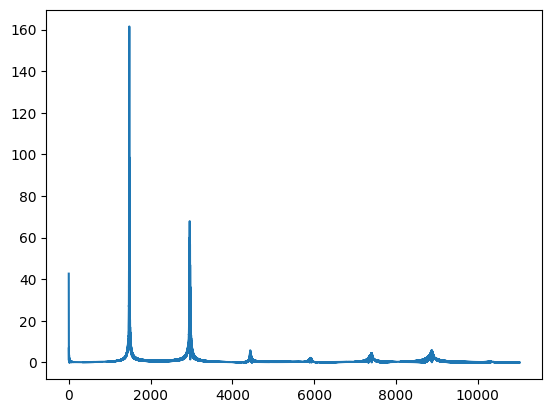

In [4]:
from scipy.fftpack import rfft, irfft, fftfreq, fft, rfftfreq
audio_fft = abs(rfft(audio))
sample_period = 1/sample_rate
W=rfftfreq(audio.size,sample_period)
plt.plot(W,audio_fft)
plt.show

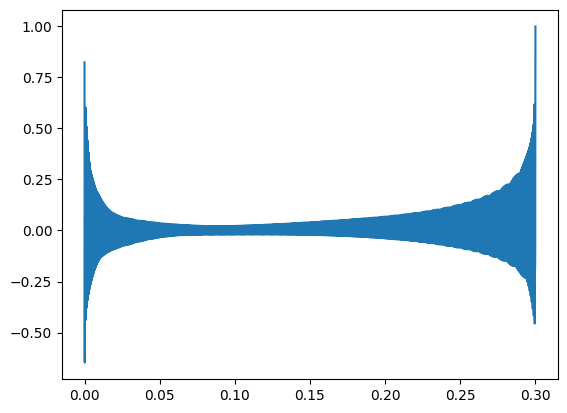

In [5]:
inverse = irfft(audio_fft)
plt.plot(time,inverse)
Audio(inverse, rate = sample_rate)

[0.0, 1453.3333333333335, 1456.6666666666667, 1456.6666666666667, 1460.0, 1460.0, 1463.3333333333335, 1463.3333333333335, 1466.6666666666667, 1466.6666666666667, 1470.0, 1470.0, 1473.3333333333335, 1473.3333333333335, 1476.6666666666667, 1476.6666666666667, 1480.0, 1480.0, 1483.3333333333335, 1483.3333333333335, 1486.6666666666667, 1486.6666666666667, 1490.0, 1490.0, 1493.3333333333335, 1493.3333333333335, 1496.6666666666667, 1496.6666666666667, 1500.0, 1503.3333333333335, 1506.6666666666667, 1510.0, 1513.3333333333335, 2926.666666666667, 2930.0, 2930.0, 2933.3333333333335, 2933.3333333333335, 2936.666666666667, 2936.666666666667, 2940.0, 2940.0, 2943.3333333333335, 2943.3333333333335, 2946.666666666667, 2946.666666666667, 2950.0, 2950.0, 2953.3333333333335, 2953.3333333333335, 2956.666666666667, 2960.0, 2960.0, 2963.3333333333335, 2963.3333333333335, 2966.666666666667, 2970.0, 2973.3333333333335, 2976.666666666667, 2980.0, 2983.3333333333335, 2986.666666666667, 2990.0, 2993.3333333333

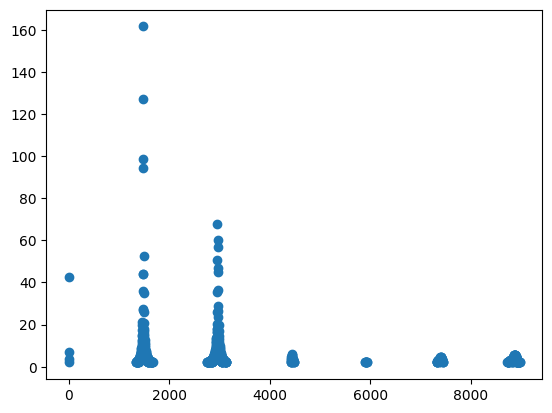

In [6]:
#الكلين فريكونسي ده عشان نشيل ال نويز
clean_freq = list()
clean_amp = list()

#ال بيكس عشان نطلع ال المين
peaks = list()
# للرسم بس
peaks_amp = list()

for i in range(len(W)):
    #نفلتر الفريكونسيز
    #ال خمسه رقم جي بالحب من الرسمه اللي فوق
    if (audio_fft[i]>2 ):
        clean_freq.append(W[i])
        clean_amp.append(audio_fft[i])
    #نطلع منها ا
    if (audio_fft[i]>10 ):
        peaks.append(W[i])
        peaks_amp.append(audio_fft[i])
print(peaks)
print(peaks_amp)
plt.scatter( clean_freq, clean_amp)

clean_freq= np.array(clean_freq)
clean_amp = np.array(clean_amp)

# #بنقسم ال الفورمانتس
formant1 = clean_freq[(clean_freq>2800)&(clean_freq<3200)]
formant1_std = formant1.std()

formant2 = clean_freq[(clean_freq>5800)&(clean_freq<6200)]
formant2_std = formant2.std()

formant3 = clean_freq[(clean_freq>-10)&(clean_freq<100)]
formant3_std = formant3.std()

# formant3 = clean_freq[(clean_freq<750)]
# formant3_std = formant3.std()

# # خد الpeaks من الرسمة بالعين 
peaks = (2957, 5927,0)
print(peaks)
# #standard dev
stds = [formant1_std, formant2_std, formant3_std]

array([0.84127538, 0.69048305, 0.80996098, ..., 0.71109373, 0.95549876,
       0.13644172])

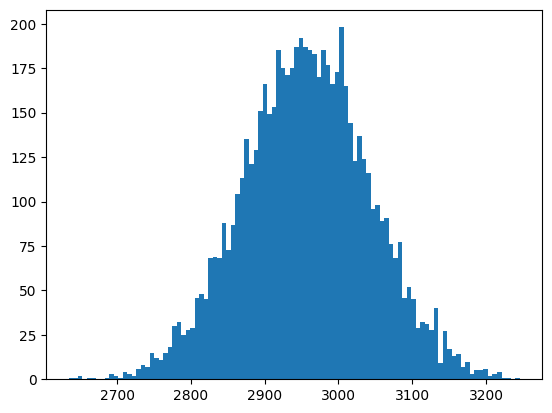

In [7]:
import scipy.stats as sc
random1 = np.random.normal(2957,formant1_std, len(W))

plt.hist(random1,bins=100)

sc.norm(2957,formant1_std).cdf(random1)

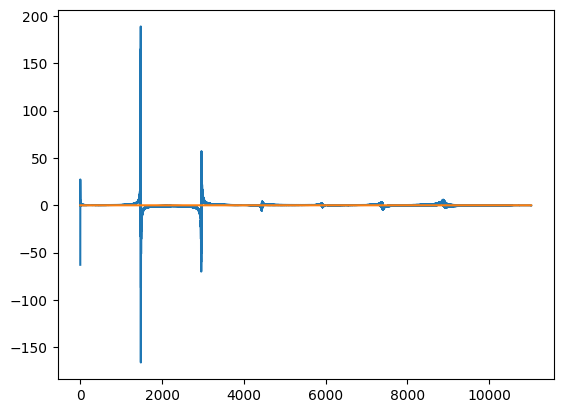

In [9]:
f_signal = rfft(audio)
def remove_f(audio, peaks,stds):
    sample_period = 1/samples_rate
    n_samples = len(audio)
    W = rfftfreq(audio.size, d=sample_period)
    # f_signal : forier transform magnitudes
    audio_ = rfft(audio)
    plt.plot(W, audio_)

    cut_f_signal = f_signal.copy()
    for i in range(len(peaks)):
        cut_f_signal *= 10**(-1000*sc.norm(peaks[i],stds[i]).cdf(W)/20)
    plt.plot(W,cut_f_signal)
    audio = irfft(cut_f_signal)
    return audio
audio, samples_rate = librosa.load(path)
audio = remove_f(audio, peaks,stds)
Audio(audio, rate = samples_rate)